In [ ]:
'''
PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp 
  where gggg indicates a group the passenger is travelling with and pp is their 
  number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of 
  permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended 
  animation for the duration of the voyage. Passengers in cryosleep are confined 
  to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form 
  deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has 
  billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. 
  This is the target, the column you are trying to predict.
'''

"\nPassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp \n  where gggg indicates a group the passenger is travelling with and pp is their \n  number within the group. People in a group are often family members, but not always.\n\nHomePlanet - The planet the passenger departed from, typically their planet of \n  permanent residence.\n\nCryoSleep - Indicates whether the passenger elected to be put into suspended \n  animation for the duration of the voyage. Passengers in cryosleep are confined \n  to their cabins.\n\nCabin - The cabin number where the passenger is staying. Takes the form \n  deck/num/side, where side can be either P for Port or S for Starboard.\n\nDestination - The planet the passenger will be debarking to.\n\nAge - The age of the passenger.\n\nVIP - Whether the passenger has paid for special VIP service during the voyage.\n\nRoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has \n  billed at each of the Spaceship Titanic's 

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# TRAIN data

In [ ]:
#import training dataset from kaggle
Space = pd.read_csv("/content/train.csv", sep = ',')
Space

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [ ]:
Space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
Space.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [ ]:
Space.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

# PassengerId --> InGroup

In [ ]:
type(len(Space.PassengerId))

int

In [ ]:
Space.iloc[len(Space.PassengerId) - 1].PassengerId

'9280_02'

In [ ]:
InGroup = []

for i in range(0, len(Space.PassengerId)):
  #Space.iloc[i].PassengerId = Space.iloc[i].PassengerId[5:6]
  #print(Space.iloc[i].PassengerId)
  #Space.iloc
  if Space.iloc[i].PassengerId == Space.iloc[len(Space.PassengerId) - 1].PassengerId:
    if Space.iloc[i].PassengerId[:4] == Space.iloc[i-1].PassengerId[0:4]:
      InGroup.append(True)
    else:
      InGroup.append(False)
  else:
    if Space.iloc[i].PassengerId[:4] == Space.iloc[i+1].PassengerId[0:4]:
    #print("1")
      InGroup.append(True)
    else:
    #print("0")
      if Space.iloc[i].PassengerId[:4] == Space.iloc[i-1].PassengerId[0:4]:
        InGroup.append(True)
      else:
        InGroup.append(False)
    #InGroup.append["1"]
  #else:
    #InGroup.append["0"]


In [ ]:
print(InGroup)

[False, False, True, True, False, False, True, True, False, True, True, True, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, False, False, False, False, False, False, True, True, True, False, False, False, False, False, False, False, True, True, True, True, True, False, False, False, False, True, True, True, False, False, False, True, True, False, True, True, True, False, False, False, False, False, False, False, False, False, False, False, True, True, True, False, False, False, False, False, True, True, True, True, True, False, True, True, True, True, False, False, True, True, True, False, False, True, True, True, True, True, True, True, False, False, False, False, False, False, True, True, False, False, False, False, False, True, True, False, True, True, False, False, True, True, False, True, True, False, False, False, False, False, False, False, False, False, True, True, True, True, False, True, True, False, False, False, False, Fals

In [ ]:
Space['InGroup'] = InGroup
Space['InGroup'] = Space['InGroup'].astype(int)
Space['InGroup'].isna().sum()
Space

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,InGroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1


# Home Planet

In [ ]:
Space["HomePlanet"].value_counts() #Replace NaN w/ Earth

Earth     4602
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64

In [ ]:
Space['HomePlanet'] = Space['HomePlanet'].fillna("Earth")
Space
#Space['HomePlanet'].isna().sum()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,InGroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1


In [ ]:
Space.HomePlanet = pd.Categorical(Space.HomePlanet)
Space.HomePlanet = Space.HomePlanet.cat.codes
Space

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,InGroup
0,0001_01,1,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0
1,0002_01,0,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0
2,0003_01,1,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1
3,0003_02,1,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1
4,0004_01,0,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0
8689,9278_01,0,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0
8690,9279_01,0,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0
8691,9280_01,1,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1


# CryoSleep

In [ ]:
Space["CryoSleep"].value_counts() #more falses than true

Space['CryoSleep'] = Space['CryoSleep'].fillna(0)
Space['CryoSleep'] = Space['CryoSleep'].astype(int)
Space['CryoSleep'].isna().sum()
Space

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,InGroup
0,0001_01,1,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0
1,0002_01,0,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0
2,0003_01,1,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1
3,0003_02,1,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1
4,0004_01,0,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0
8689,9278_01,0,1,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0
8690,9279_01,0,0,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0
8691,9280_01,1,0,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1


# !Cabin

In [ ]:
Space["Cabin"].value_counts() #Replace NaN w/ Earth

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64

In [ ]:
Space['CabinDeck'] = Space['Cabin'].str[:1]
Space

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,InGroup,CabinDeck
0,0001_01,1,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,B
1,0002_01,0,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,F
2,0003_01,1,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,A
3,0003_02,1,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,A
4,0004_01,0,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0,A
8689,9278_01,0,1,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0,G
8690,9279_01,0,0,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0,G
8691,9280_01,1,0,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1,E


In [ ]:
Space["CabinDeck"].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: CabinDeck, dtype: int64

In [ ]:
Space["CabinDeck"] = Space['CabinDeck'].fillna("F")
Space

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,InGroup,CabinDeck
0,0001_01,1,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,B
1,0002_01,0,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,F
2,0003_01,1,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,A
3,0003_02,1,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,A
4,0004_01,0,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0,A
8689,9278_01,0,1,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0,G
8690,9279_01,0,0,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0,G
8691,9280_01,1,0,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1,E


In [ ]:
Space.CabinDeck = pd.Categorical(Space.CabinDeck)
Space.CabinDeck = Space.CabinDeck.cat.codes
Space

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,InGroup,CabinDeck
0,0001_01,1,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1
1,0002_01,0,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,5
2,0003_01,1,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,0
3,0003_02,1,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,0
4,0004_01,0,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0,0
8689,9278_01,0,1,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0,6
8690,9279_01,0,0,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0,6
8691,9280_01,1,0,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1,4


In [ ]:
Space['CabinSide'] = Space['Cabin'].str[-1]
Space

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,InGroup,CabinDeck,CabinSide
0,0001_01,1,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,P
1,0002_01,0,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,5,S
2,0003_01,1,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,0,S
3,0003_02,1,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,0,S
4,0004_01,0,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0,0,P
8689,9278_01,0,1,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0,6,S
8690,9279_01,0,0,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0,6,S
8691,9280_01,1,0,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1,4,S


In [ ]:
Space["CabinSide"].value_counts()
#50/50 split for cabin side, could drop

S    4288
P    4206
Name: CabinSide, dtype: int64

In [ ]:
Space.CabinSide = pd.Categorical(Space.CabinSide)
Space.CabinSide = Space.CabinSide.cat.codes
Space

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,InGroup,CabinDeck,CabinSide
0,0001_01,1,0,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0
1,0002_01,0,0,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,5,1
2,0003_01,1,0,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,0,1
3,0003_02,1,0,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,0,1
4,0004_01,0,0,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0,0,0
8689,9278_01,0,1,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0,6,1
8690,9279_01,0,0,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0,6,1
8691,9280_01,1,0,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1,4,1


In [ ]:
Space = Space.drop(['Cabin'], axis=1)

# Destination

In [ ]:
Space["Destination"].value_counts()
Space["Destination"] = Space['Destination'].fillna("TRAPPIST-1e")
Space
#Space['Destination'].isna().sum()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,InGroup,CabinDeck,CabinSide
0,0001_01,1,0,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0
1,0002_01,0,0,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,5,1
2,0003_01,1,0,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,0,1
3,0003_02,1,0,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,0,1
4,0004_01,0,0,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0,0,0
8689,9278_01,0,1,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0,6,1
8690,9279_01,0,0,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0,6,1
8691,9280_01,1,0,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1,4,1


In [ ]:
Space.Destination = pd.Categorical(Space.Destination)
Space.Destination = Space.Destination.cat.codes
Space

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,InGroup,CabinDeck,CabinSide
0,0001_01,1,0,2,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0
1,0002_01,0,0,2,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,5,1
2,0003_01,1,0,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,0,1
3,0003_02,1,0,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,0,1
4,0004_01,0,0,2,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0,0,0
8689,9278_01,0,1,1,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0,6,1
8690,9279_01,0,0,2,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0,6,1
8691,9280_01,1,0,0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1,4,1


# Age

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0e188c2b0>]],
      dtype=object)

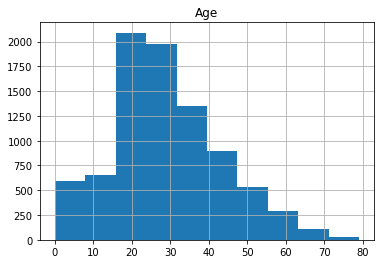

In [ ]:
Space.hist(column='Age')

In [ ]:
Space["Age"].describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

In [ ]:
Space['Age'] = Space['Age'].fillna(Space['Age'].mean())
Space

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,InGroup,CabinDeck,CabinSide
0,0001_01,1,0,2,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0
1,0002_01,0,0,2,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,5,1
2,0003_01,1,0,2,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,0,1
3,0003_02,1,0,2,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,0,1
4,0004_01,0,0,2,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,0,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0,0,0
8689,9278_01,0,1,1,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0,6,1
8690,9279_01,0,0,2,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0,6,1
8691,9280_01,1,0,0,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1,4,1


# VIP

In [ ]:
Space["VIP"].value_counts() #More falses than true

Space['VIP'] = Space['VIP'].fillna(0)
Space['VIP'] = Space['VIP'].astype(int)
Space['VIP'].isna().sum()
Space

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,InGroup,CabinDeck,CabinSide
0,0001_01,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0
1,0002_01,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,5,1
2,0003_01,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,0,1
3,0003_02,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,0,1
4,0004_01,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0,0,0
8689,9278_01,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0,6,1
8690,9279_01,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0,6,1
8691,9280_01,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1,4,1


# Numerical Variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa0e17d02e0>,
      dtype=object)

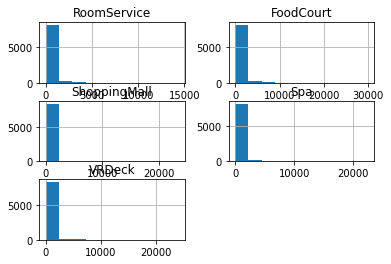

In [ ]:
Space.hist(column = ['RoomService', 'FoodCourt',	'ShoppingMall', 'Spa', 'VRDeck'])

# Room Service

count     8512.000000
mean       224.687617
std        666.717663
min          0.000000
25%          0.000000
50%          0.000000
75%         47.000000
max      14327.000000
Name: RoomService, dtype: float64

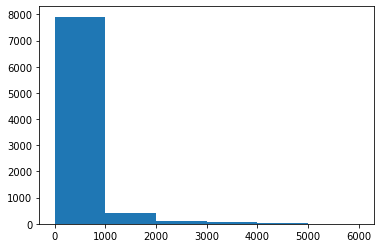

In [ ]:
plt.hist(Space.RoomService, bins=[0, 1000, 2000, 3000, 4000, 5000, 6000])
Space["RoomService"].describe()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,InGroup,CabinDeck,CabinSide
0,0001_01,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0
1,0002_01,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,5,1
2,0003_01,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,0,1
3,0003_02,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,0,1
4,0004_01,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0,0,0
8689,9278_01,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0,6,1
8690,9279_01,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0,6,1
8691,9280_01,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1,4,1


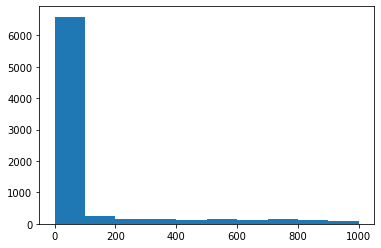

In [ ]:
plt.hist(Space.RoomService, bins=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000])
#data not normal, use median for NaN
Space['RoomService'] = Space['RoomService'].fillna(Space['RoomService'].median())
Space

# FoodCourt

count     8510.000000
mean       458.077203
std       1611.489240
min          0.000000
25%          0.000000
50%          0.000000
75%         76.000000
max      29813.000000
Name: FoodCourt, dtype: float64

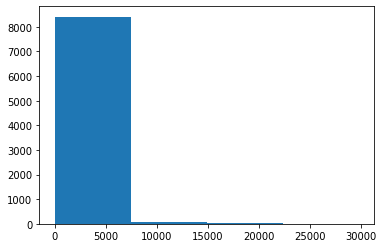

In [ ]:
plt.hist(Space.FoodCourt, bins=4)
Space["FoodCourt"].describe()

In [ ]:
Space['FoodCourt'] = Space['FoodCourt'].fillna(Space['FoodCourt'].median())
Space

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,InGroup,CabinDeck,CabinSide
0,0001_01,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0
1,0002_01,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,5,1
2,0003_01,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,0,1
3,0003_02,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,0,1
4,0004_01,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0,0,0
8689,9278_01,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0,6,1
8690,9279_01,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0,6,1
8691,9280_01,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1,4,1


# ShoppingMall

In [ ]:
Space['ShoppingMall'] = Space['ShoppingMall'].fillna(Space['ShoppingMall'].median())
Space

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,InGroup,CabinDeck,CabinSide
0,0001_01,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0
1,0002_01,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,5,1
2,0003_01,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,0,1
3,0003_02,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,0,1
4,0004_01,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0,0,0
8689,9278_01,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0,6,1
8690,9279_01,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0,6,1
8691,9280_01,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1,4,1


# Spa

(array([8.204e+03, 1.800e+02, 7.300e+01, 2.200e+01, 1.500e+01, 6.000e+00,
        6.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([    0. ,  2240.8,  4481.6,  6722.4,  8963.2, 11204. , 13444.8,
        15685.6, 17926.4, 20167.2, 22408. ]),
 <a list of 10 Patch objects>)

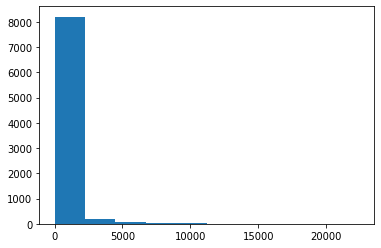

In [ ]:
plt.hist(Space.Spa)

In [ ]:
Space['Spa'] = Space['Spa'].fillna(Space['Spa'].median())
Space

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,InGroup,CabinDeck,CabinSide
0,0001_01,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0
1,0002_01,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,5,1
2,0003_01,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,0,1
3,0003_02,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,0,1
4,0004_01,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0,0,0
8689,9278_01,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0,6,1
8690,9279_01,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0,6,1
8691,9280_01,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1,4,1


# VrDeck

In [ ]:
Space['VRDeck'] = Space['VRDeck'].fillna(Space['VRDeck'].median())
Space

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,InGroup,CabinDeck,CabinSide
0,0001_01,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0
1,0002_01,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0,5,1
2,0003_01,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,1,0,1
3,0003_02,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,1,0,1
4,0004_01,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,0,0,0
8689,9278_01,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,0,6,1
8690,9279_01,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,0,6,1
8691,9280_01,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,1,4,1


# Trasnported

In [ ]:
Space['Transported'] = Space['Transported'].astype(int)
Space

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,InGroup,CabinDeck,CabinSide
0,0001_01,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,0,1,0
1,0002_01,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,0,5,1
2,0003_01,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,1,0,1
3,0003_02,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,1,0,1
4,0004_01,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,0,0,0
8689,9278_01,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,0,6,1
8690,9279_01,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,0,6,1
8691,9280_01,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,1,4,1


# Drop Columns

In [ ]:
Space = Space.drop(['Name'], axis=1)

In [ ]:
Space = Space.drop(['PassengerId'], axis=1)


In [ ]:
Space = Space.drop(['CabinSide'], axis=1)

In [ ]:
Space

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,InGroup,CabinDeck
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0,1
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,0,5
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1,0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,0,0
8689,0,1,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,0,6
8690,0,0,2,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,0,6
8691,1,0,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,1,4


# New Section

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Space[["Age", "RoomService", "FoodCourt", "ShoppingMall", 
       "Spa", "VRDeck"]] = scaler.fit_transform(Space[["Age", "RoomService", 
                                                       "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]])
Space

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,InGroup,CabinDeck
0,1,0,2,0.493671,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1
1,0,0,2,0.303797,0,0.007608,0.000302,0.001064,0.024500,0.001823,1,0,5
2,1,0,2,0.734177,1,0.003001,0.119948,0.000000,0.299670,0.002030,0,1,0
3,1,0,2,0.417722,0,0.000000,0.043035,0.015793,0.148563,0.007997,0,1,0
4,0,0,2,0.202532,0,0.021149,0.002348,0.006428,0.025214,0.000083,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,0.518987,1,0.000000,0.228726,0.000000,0.073322,0.003066,0,0,0
8689,0,1,1,0.227848,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,6
8690,0,0,2,0.329114,0,0.000000,0.000000,0.079687,0.000045,0.000000,1,0,6
8691,1,0,0,0.405063,0,0.000000,0.035186,0.000000,0.015753,0.134049,0,1,4


# Export Train

In [ ]:
Space.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
InGroup         0
CabinDeck       0
dtype: int64

In [ ]:
Space

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,InGroup,CabinDeck
0,1,0,2,0.493671,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,1
1,0,0,2,0.303797,0,0.007608,0.000302,0.001064,0.024500,0.001823,1,0,5
2,1,0,2,0.734177,1,0.003001,0.119948,0.000000,0.299670,0.002030,0,1,0
3,1,0,2,0.417722,0,0.000000,0.043035,0.015793,0.148563,0.007997,0,1,0
4,0,0,2,0.202532,0,0.021149,0.002348,0.006428,0.025214,0.000083,1,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,0.518987,1,0.000000,0.228726,0.000000,0.073322,0.003066,0,0,0
8689,0,1,1,0.227848,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,6
8690,0,0,2,0.329114,0,0.000000,0.000000,0.079687,0.000045,0.000000,1,0,6
8691,1,0,0,0.405063,0,0.000000,0.035186,0.000000,0.015753,0.134049,0,1,4


In [ ]:
#only export when needed
#Space.to_csv('Space_Titanic_pp3.csv', index=False)

# TEST data


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#import test data from kaggle
space_tst = pd.read_csv("/content/test.csv", sep = ',')
space_tst

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [ ]:
space_tst.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

# INGroup Test

In [ ]:
InGroup = []

for i in range(0, len(space_tst.PassengerId)):
  #Space.iloc[i].PassengerId = Space.iloc[i].PassengerId[5:6]
  #print(Space.iloc[i].PassengerId)
  #Space.iloc
  if space_tst.iloc[i].PassengerId == space_tst.iloc[len(space_tst.PassengerId) - 1].PassengerId:
    if space_tst.iloc[i].PassengerId[:4] == space_tst.iloc[i-1].PassengerId[0:4]:
      InGroup.append(True)
    else:
      InGroup.append(False)
  else:
    if space_tst.iloc[i].PassengerId[:4] == space_tst.iloc[i+1].PassengerId[0:4]:
    #print("1")
      InGroup.append(True)
    else:
    #print("0")
      if space_tst.iloc[i].PassengerId[:4] == space_tst.iloc[i-1].PassengerId[0:4]:
        InGroup.append(True)
      else:
        InGroup.append(False)
    #InGroup.append["1"]
  #else:
    #InGroup.append["0"]


In [ ]:
space_tst['InGroup'] = InGroup
space_tst['InGroup'] = space_tst['InGroup'].astype(int)
space_tst['InGroup'].isna().sum()
space_tst

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,InGroup
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,1
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,0
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,0
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,0


# HomePlanet Test

In [ ]:
space_tst["HomePlanet"].value_counts() #Replace NaN w/ Earth

Earth     2263
Europa    1002
Mars       925
Name: HomePlanet, dtype: int64

In [ ]:
space_tst['HomePlanet'] = space_tst['HomePlanet'].fillna("Earth")
space_tst

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,InGroup
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,1
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,0
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,0
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,0


In [ ]:
space_tst.HomePlanet = pd.Categorical(space_tst.HomePlanet)
space_tst.HomePlanet = space_tst.HomePlanet.cat.codes
space_tst

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,InGroup
0,0013_01,0,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0
1,0018_01,0,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0
2,0019_01,1,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0
3,0021_01,1,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0
4,0023_01,0,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,0,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,1
4273,9269_01,0,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,0
4274,9271_01,2,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,0
4275,9273_01,1,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,0


# Cryo Test

In [ ]:
space_tst["CryoSleep"].value_counts() #more falses than true
space_tst['CryoSleep'] = space_tst['CryoSleep'].fillna(0)

In [ ]:
space_tst['CryoSleep'] = space_tst['CryoSleep'].astype(int)
space_tst

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,InGroup
0,0013_01,0,1,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0
1,0018_01,0,0,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0
2,0019_01,1,1,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0
3,0021_01,1,0,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0
4,0023_01,0,0,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,0,1,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,1
4273,9269_01,0,0,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,0
4274,9271_01,2,1,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,0
4275,9273_01,1,0,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,0


# Cabin Deck

In [ ]:
space_tst['CabinDeck'] = space_tst['Cabin'].str[:1]
space_tst["CabinDeck"].value_counts() #Replace NaN w/ Earth

F    1445
G    1222
E     447
B     362
C     355
D     242
A      98
T       6
Name: CabinDeck, dtype: int64

In [ ]:
space_tst["CabinDeck"] = space_tst['CabinDeck'].fillna("F")
space_tst.CabinDeck = pd.Categorical(space_tst.CabinDeck)
space_tst.CabinDeck = space_tst.CabinDeck.cat.codes
space_tst

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,InGroup,CabinDeck
0,0013_01,0,1,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0,6
1,0018_01,0,0,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0,5
2,0019_01,1,1,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0,2
3,0021_01,1,0,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0,2
4,0023_01,0,0,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,0,1,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,1,6
4273,9269_01,0,0,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,0,5
4274,9271_01,2,1,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,0,3
4275,9273_01,1,0,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,0,3


# Dest Test

In [ ]:
space_tst["Destination"] = space_tst['Destination'].fillna("TRAPPIST-1e")
space_tst.Destination = pd.Categorical(space_tst.Destination)
space_tst.Destination = space_tst.Destination.cat.codes
space_tst

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,InGroup,CabinDeck
0,0,1,3,27.000000,0,0.0,0.0,0.0,0.0,0.0,0,6
1,0,0,3,19.000000,0,0.0,9.0,0.0,2823.0,0.0,0,5
2,1,1,1,31.000000,0,0.0,0.0,0.0,0.0,0.0,0,2
3,1,0,3,38.000000,0,0.0,6652.0,0.0,181.0,585.0,0,2
4,0,0,3,20.000000,0,10.0,0.0,635.0,0.0,0.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,3,34.000000,0,0.0,0.0,0.0,0.0,0.0,1,6
4273,0,0,3,42.000000,0,0.0,847.0,17.0,10.0,144.0,0,5
4274,2,1,1,28.658146,0,0.0,0.0,0.0,0.0,0.0,0,3
4275,1,0,0,28.658146,0,0.0,2680.0,0.0,0.0,523.0,0,3


# AGE test

count    4277.000000
mean       28.658146
std        14.027384
min         0.000000
25%        20.000000
50%        27.000000
75%        37.000000
max        79.000000
Name: Age, dtype: float64

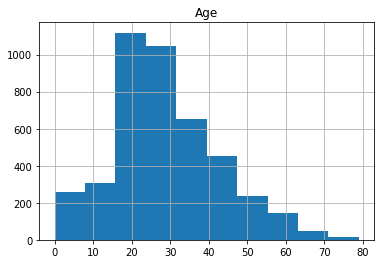

In [ ]:
space_tst.hist(column='Age')
space_tst["Age"].describe()

In [ ]:
space_tst['Age'] = space_tst['Age'].fillna(space_tst['Age'].mean())
space_tst

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,InGroup,CabinDeck
0,0,1,3,27.000000,0,0.0,0.0,0.0,0.0,0.0,0,6
1,0,0,3,19.000000,0,0.0,9.0,0.0,2823.0,0.0,0,5
2,1,1,1,31.000000,0,0.0,0.0,0.0,0.0,0.0,0,2
3,1,0,3,38.000000,0,0.0,6652.0,0.0,181.0,585.0,0,2
4,0,0,3,20.000000,0,10.0,0.0,635.0,0.0,0.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,3,34.000000,0,0.0,0.0,0.0,0.0,0.0,1,6
4273,0,0,3,42.000000,0,0.0,847.0,17.0,10.0,144.0,0,5
4274,2,1,1,28.658146,0,0.0,0.0,0.0,0.0,0.0,0,3
4275,1,0,0,28.658146,0,0.0,2680.0,0.0,0.0,523.0,0,3


# VIP Test

In [ ]:
space_tst["VIP"].value_counts() #More falses than true
space_tst['VIP'] = space_tst['VIP'].fillna(0)
space_tst['VIP'] = space_tst['VIP'].astype(int)
space_tst['VIP'].isna().sum()
space_tst

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,InGroup,CabinDeck
0,0,1,3,27.000000,0,0.0,0.0,0.0,0.0,0.0,0,6
1,0,0,3,19.000000,0,0.0,9.0,0.0,2823.0,0.0,0,5
2,1,1,1,31.000000,0,0.0,0.0,0.0,0.0,0.0,0,2
3,1,0,3,38.000000,0,0.0,6652.0,0.0,181.0,585.0,0,2
4,0,0,3,20.000000,0,10.0,0.0,635.0,0.0,0.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,3,34.000000,0,0.0,0.0,0.0,0.0,0.0,1,6
4273,0,0,3,42.000000,0,0.0,847.0,17.0,10.0,144.0,0,5
4274,2,1,1,28.658146,0,0.0,0.0,0.0,0.0,0.0,0,3
4275,1,0,0,28.658146,0,0.0,2680.0,0.0,0.0,523.0,0,3


# Numerical Test

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fea784e2580>,
      dtype=object)

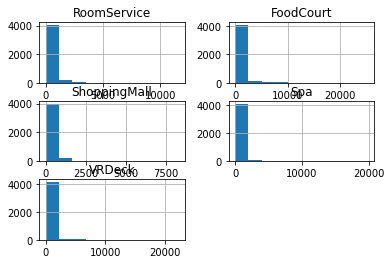

In [ ]:
space_tst.hist(column = ['RoomService', 'FoodCourt',	'ShoppingMall', 'Spa', 'VRDeck'])

In [ ]:
space_tst['RoomService'] = space_tst['RoomService'].fillna(space_tst['RoomService'].median())
space_tst

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,InGroup,CabinDeck
0,0,1,3,27.000000,0,0.0,0.0,0.0,0.0,0.0,0,6
1,0,0,3,19.000000,0,0.0,9.0,0.0,2823.0,0.0,0,5
2,1,1,1,31.000000,0,0.0,0.0,0.0,0.0,0.0,0,2
3,1,0,3,38.000000,0,0.0,6652.0,0.0,181.0,585.0,0,2
4,0,0,3,20.000000,0,10.0,0.0,635.0,0.0,0.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,3,34.000000,0,0.0,0.0,0.0,0.0,0.0,1,6
4273,0,0,3,42.000000,0,0.0,847.0,17.0,10.0,144.0,0,5
4274,2,1,1,28.658146,0,0.0,0.0,0.0,0.0,0.0,0,3
4275,1,0,0,28.658146,0,0.0,2680.0,0.0,0.0,523.0,0,3


In [ ]:
space_tst['FoodCourt'] = space_tst['FoodCourt'].fillna(space_tst['FoodCourt'].median())
space_tst

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,InGroup,CabinDeck
0,0,1,3,27.000000,0,0.0,0.0,0.0,0.0,0.0,0,6
1,0,0,3,19.000000,0,0.0,9.0,0.0,2823.0,0.0,0,5
2,1,1,1,31.000000,0,0.0,0.0,0.0,0.0,0.0,0,2
3,1,0,3,38.000000,0,0.0,6652.0,0.0,181.0,585.0,0,2
4,0,0,3,20.000000,0,10.0,0.0,635.0,0.0,0.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,3,34.000000,0,0.0,0.0,0.0,0.0,0.0,1,6
4273,0,0,3,42.000000,0,0.0,847.0,17.0,10.0,144.0,0,5
4274,2,1,1,28.658146,0,0.0,0.0,0.0,0.0,0.0,0,3
4275,1,0,0,28.658146,0,0.0,2680.0,0.0,0.0,523.0,0,3


In [ ]:
space_tst['ShoppingMall'] = space_tst['ShoppingMall'].fillna(space_tst['ShoppingMall'].median())
space_tst

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,InGroup,CabinDeck
0,0,1,3,27.000000,0,0.0,0.0,0.0,0.0,0.0,0,6
1,0,0,3,19.000000,0,0.0,9.0,0.0,2823.0,0.0,0,5
2,1,1,1,31.000000,0,0.0,0.0,0.0,0.0,0.0,0,2
3,1,0,3,38.000000,0,0.0,6652.0,0.0,181.0,585.0,0,2
4,0,0,3,20.000000,0,10.0,0.0,635.0,0.0,0.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,3,34.000000,0,0.0,0.0,0.0,0.0,0.0,1,6
4273,0,0,3,42.000000,0,0.0,847.0,17.0,10.0,144.0,0,5
4274,2,1,1,28.658146,0,0.0,0.0,0.0,0.0,0.0,0,3
4275,1,0,0,28.658146,0,0.0,2680.0,0.0,0.0,523.0,0,3


In [ ]:
space_tst['Spa'] = space_tst['Spa'].fillna(space_tst['Spa'].median())
space_tst

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,InGroup,CabinDeck
0,0,1,3,27.000000,0,0.0,0.0,0.0,0.0,0.0,0,6
1,0,0,3,19.000000,0,0.0,9.0,0.0,2823.0,0.0,0,5
2,1,1,1,31.000000,0,0.0,0.0,0.0,0.0,0.0,0,2
3,1,0,3,38.000000,0,0.0,6652.0,0.0,181.0,585.0,0,2
4,0,0,3,20.000000,0,10.0,0.0,635.0,0.0,0.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,3,34.000000,0,0.0,0.0,0.0,0.0,0.0,1,6
4273,0,0,3,42.000000,0,0.0,847.0,17.0,10.0,144.0,0,5
4274,2,1,1,28.658146,0,0.0,0.0,0.0,0.0,0.0,0,3
4275,1,0,0,28.658146,0,0.0,2680.0,0.0,0.0,523.0,0,3


In [ ]:
space_tst['VRDeck'] = space_tst['VRDeck'].fillna(space_tst['VRDeck'].median())
space_tst

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,InGroup,CabinDeck
0,0,1,3,27.000000,0,0.0,0.0,0.0,0.0,0.0,0,6
1,0,0,3,19.000000,0,0.0,9.0,0.0,2823.0,0.0,0,5
2,1,1,1,31.000000,0,0.0,0.0,0.0,0.0,0.0,0,2
3,1,0,3,38.000000,0,0.0,6652.0,0.0,181.0,585.0,0,2
4,0,0,3,20.000000,0,10.0,0.0,635.0,0.0,0.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,3,34.000000,0,0.0,0.0,0.0,0.0,0.0,1,6
4273,0,0,3,42.000000,0,0.0,847.0,17.0,10.0,144.0,0,5
4274,2,1,1,28.658146,0,0.0,0.0,0.0,0.0,0.0,0,3
4275,1,0,0,28.658146,0,0.0,2680.0,0.0,0.0,523.0,0,3


# DROP

In [ ]:
space_tst = space_tst.drop(['Name'], axis=1)
space_tst = space_tst.drop(['PassengerId'], axis=1)
space_tst = space_tst.drop(['Cabin'], axis=1)

KeyError: ignored

In [ ]:
space_tst

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,InGroup,CabinDeck
0,0,1,3,27.000000,0,0.0,0.0,0.0,0.0,0.0,0,6
1,0,0,3,19.000000,0,0.0,9.0,0.0,2823.0,0.0,0,5
2,1,1,1,31.000000,0,0.0,0.0,0.0,0.0,0.0,0,2
3,1,0,3,38.000000,0,0.0,6652.0,0.0,181.0,585.0,0,2
4,0,0,3,20.000000,0,10.0,0.0,635.0,0.0,0.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,3,34.000000,0,0.0,0.0,0.0,0.0,0.0,1,6
4273,0,0,3,42.000000,0,0.0,847.0,17.0,10.0,144.0,0,5
4274,2,1,1,28.658146,0,0.0,0.0,0.0,0.0,0.0,0,3
4275,1,0,0,28.658146,0,0.0,2680.0,0.0,0.0,523.0,0,3


In [ ]:
space_tst.isna().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
InGroup         0
CabinDeck       0
dtype: int64

# Export Test

In [ ]:
space_tst.to_csv('Space_Titanic_pp_TESTT.csv', index=False)

In [ ]:
space_nonan

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,InGroup,CabinDeck
0,0013_01,0,1,G/3/S,2,27.0,0,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,0,6
1,0018_01,0,0,F/4/S,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,0,5
2,0019_01,1,1,C/0/S,0,31.0,0,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,0,2
3,0021_01,1,0,C/1/S,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,0,2
4,0023_01,0,0,F/5/S,2,20.0,0,10.0,0.0,635.0,0.0,0.0,Brence Harperez,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4269,9263_01,0,1,G/1495/S,2,43.0,0,0.0,0.0,0.0,0.0,0.0,Loisey Heney,0,6
4270,9265_01,2,0,D/278/S,2,43.0,0,47.0,0.0,3851.0,0.0,0.0,Toate Cure,0,3
4271,9266_01,0,0,F/1796/S,2,40.0,0,0.0,865.0,0.0,3.0,0.0,Danna Peter,1,5
4272,9266_02,0,1,G/1496/S,2,34.0,0,0.0,0.0,0.0,0.0,0.0,Jeron Peter,1,6


In [ ]:
space_nonan = space_nonan.drop(['Name'], axis=1)
space_nonan = space_nonan.drop(['PassengerId'], axis=1)
space_nonan = space_nonan.drop(['Cabin'], axis=1)

In [ ]:
space_nonan

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,InGroup,CabinDeck
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,0,6
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,0,5
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,0,2
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,0,2
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4269,0,1,2,43.0,0,0.0,0.0,0.0,0.0,0.0,0,6
4270,2,0,2,43.0,0,47.0,0.0,3851.0,0.0,0.0,0,3
4271,0,0,2,40.0,0,0.0,865.0,0.0,3.0,0.0,1,5
4272,0,1,2,34.0,0,0.0,0.0,0.0,0.0,0.0,1,6


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
space_nonan[["Age", "RoomService", "FoodCourt", "ShoppingMall", 
       "Spa", "VRDeck"]] = scaler.fit_transform(space_nonan[["Age", "RoomService", 
                                                       "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]])
space_nonan

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,InGroup,CabinDeck
0,0,1,2,0.341772,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,6
1,0,0,2,0.240506,0,0.000000,0.000433,0.000000,0.179432,0.000000,0,5
2,1,1,0,0.392405,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,2
3,1,0,2,0.481013,0,0.000000,0.319669,0.000000,0.011504,0.030651,0,2
4,0,0,2,0.253165,0,0.000865,0.000000,0.076580,0.000000,0.000000,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
4269,0,1,2,0.544304,0,0.000000,0.000000,0.000000,0.000000,0.000000,0,6
4270,2,0,2,0.544304,0,0.004063,0.000000,0.464424,0.000000,0.000000,0,3
4271,0,0,2,0.506329,0,0.000000,0.041569,0.000000,0.000191,0.000000,1,5
4272,0,1,2,0.430380,0,0.000000,0.000000,0.000000,0.000000,0.000000,1,6


In [ ]:
#only export when needed
#space_nonan.to_csv('Space_Titanic_pp_TEST2.csv', index=False)